GRIP : THE SPARKS FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS INTERN 

TASK2 : PREDICTION USING UNSUPERVISED LEARNING ML

AUTHOR : SNEHA WANDHARE


**Objective** :  From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
#ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize']=[15,8]

### Load the Iris dataset

In [3]:
df_Iris = sns.load_dataset("Iris")
df_Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df_Iris.shape

(150, 5)

Since, we are performing a unsupervised learning we shall therefore drop the last species column

In [5]:
df_Iris = df_Iris.drop('species',axis=1)

In [6]:
df_Iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df_Iris.shape

(150, 4)

In [8]:
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df_Iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Null value analysis

In [10]:
df_Iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [11]:
# Normalize X

mms = MinMaxScaler()
mms.fit(df_Iris)
df_Iris_norm = pd.DataFrame(mms.transform(df_Iris),columns= df_Iris.columns)
df_Iris_norm.shape



(150, 4)

we normalise the data to bring all the features in same scale. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

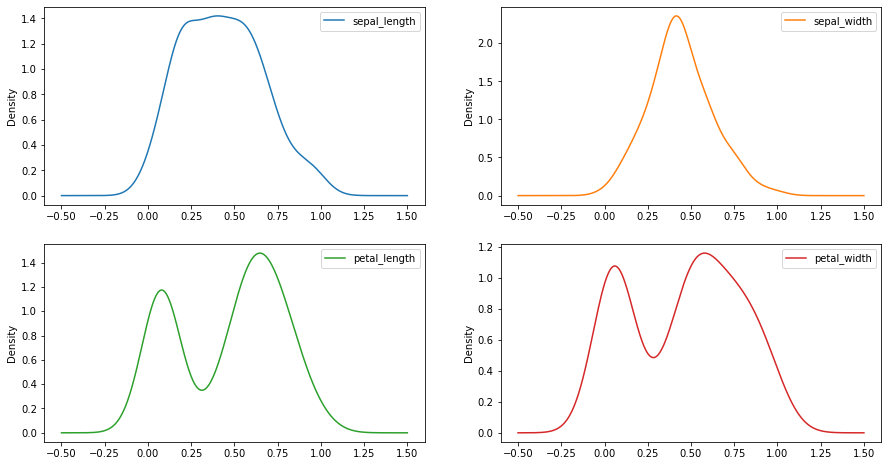

In [12]:
df_Iris_norm.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False)

plt.show()

## K-Mean clustering

#### Finding the optimal value of K 

Here we consider two techniques (elbow/scree plot and Silhouette score) to decide the optimal value of `K` to perform the K-means clustering.

In [17]:
wcss = [] #Within-Cluster um of Square

for i in range(1,21):
    K_mean = KMeans(n_clusters =i ,random_state = 50)
    K_mean.fit(df_Iris_norm)
    wcss.append(K_mean.inertia_)

Plotting the elbow plot

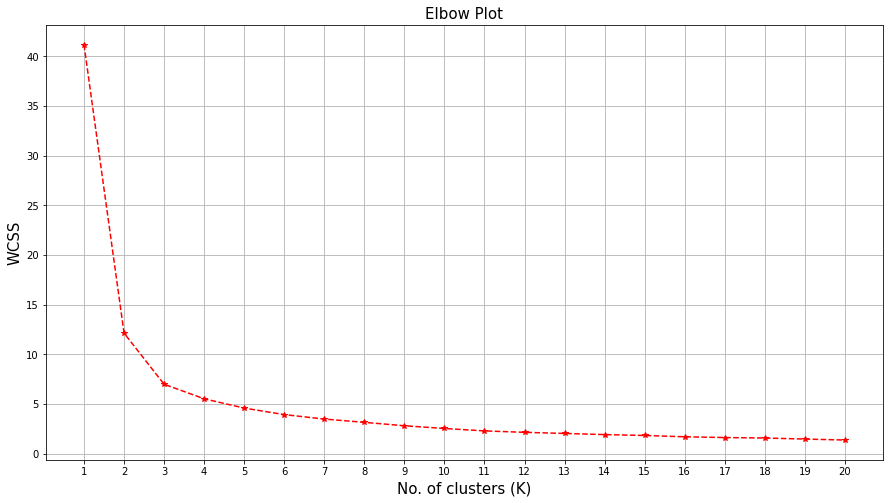

In [14]:
plt.plot(range(1,21),wcss,'r*--')
plt.title('Elbow Plot', fontsize = 15)
plt.xticks(range(1, 21))
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.grid()
# display the plot
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as *'3*'.

Building cluster for k=3

In [35]:
Cluster = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 50)
Kmean_fit = Cluster.fit(df_Iris_norm)
prediction = Kmean_fit.fit_predict(df_Iris_norm)

In [33]:
df_Iris_norm['Cluster'] = Kmean_fit.labels_
df_Iris_norm.head(2)

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,0.222222,0.625000,0.067797,0.041667,2
1,0.166667,0.416667,0.067797,0.041667,2


In [34]:
df_Iris_norm.Cluster.value_counts()

0    61
2    50
1    39
Name: Cluster, dtype: int64

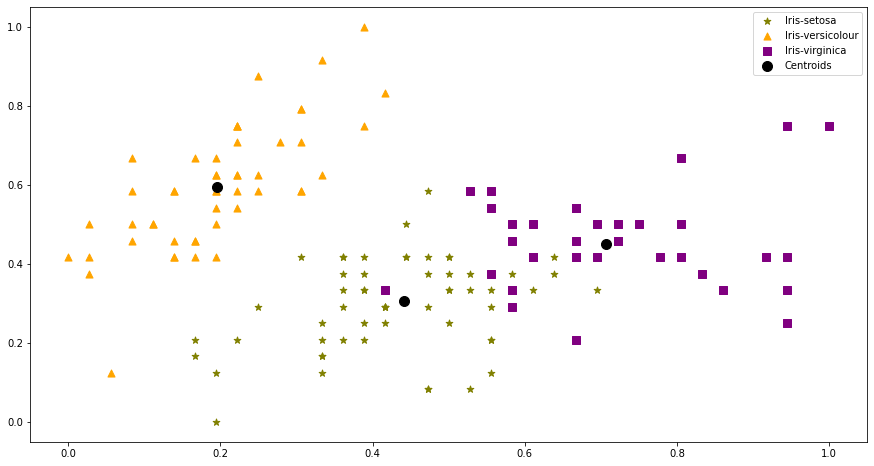

In [37]:
x = df_Iris_norm.iloc[:,[0,1,2,3]].values
# Visualising the clusters - On the first two columns
plt.scatter(x[prediction == 0, 0], x[prediction == 0, 1],s = 50, c = 'olive',marker='*', label = 'Iris-setosa')
plt.scatter(x[prediction == 1, 0], x[prediction == 1, 1],s = 50, c = 'orange',marker='^' ,label = 'Iris-versicolour')
plt.scatter(x[prediction == 2, 0], x[prediction == 2, 1],s = 50, c = 'purple',marker=',', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(Kmean_fit.cluster_centers_[:, 0], Kmean_fit.cluster_centers_[:,1], s = 100, c = 'black',marker='o',label = 'Centroids')

plt.legend()